# Plotting with pandas and matplotlib

At this point we are familiar with some of the features of pandas and explored some very basic data visualizations at the [end of Chapter 3](../../chapter-03/nb/03-temporal-data.ipynb). Now, we will wade into visualizing our data in more detail, starting by using the built-in plotting options available directly in pandas. Much like the case of pandas being built upon numpy, plotting in pandas takes advantage of plotting features from the `matplotlib` [^matplotlib] plotting library. Plotting in pandas provides a basic framework for quickly visualizing our data, but as you'll see we will need to also use features from matplotlib for more advanced formatting and to enhance our plots. In particular, we will use features from the the `pyplot` [^pyplot] module in matplotlib, which provides MATLAB-like [^matlab] plotting. We will also briefly explore creating interactive plots using the `hvplot` [^hvplot] plotting library, which allows us to produce plots similar to those available in the `bokeh` plotting library [^bokeh] using plotting syntax very similar to that in pandas.

## Creating a basic x-y plot

The first step for creating a basic x-y plot is to import pandas and read in the data we want to plot from a file. We will be using a datetime index for our weather observation data as we [learned in Chapter 3](../../chapter-03/nb/03-temporal-data.ipynb). In this case, however, we'll include a few additional parameters in order to *read the data* with a datetime index. We will read in the data first, and then discuss what happened.

Let's start by importing the libraries we will need (pandas and Matplotlib), and then read in the data.

In [1]:
import warnings

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

fp = "data/029740.txt"

data = pd.read_csv(
    fp,
    delim_whitespace=True,
    na_values=["*", "**", "***", "****", "*****", "******"],
    usecols=["YR--MODAHRMN", "TEMP", "MAX", "MIN"],
    parse_dates=["YR--MODAHRMN"],
    index_col="YR--MODAHRMN",
)

So, let us now examing what is different here compared to files read in Chapter 3. There are two significant changes in the form of two new parameters: `parse_dates` and `index_col`.

- `parse_dates` takes a Python list of column name(s) for data file columns that contain date data and pandas will parse and convert data in these column(s) to the *datetime* data type. For many common date formats pandas will automatically recognize and convert the date data.
- `index_col` is used to state a column that should be used to index the data in the DataFrame. In this case, we end up with our date data as the DataFrame index. This is a very useful feature in pandas as we will see below.

Having read in the data file, we can now have a quick look at what we have using `data.head()`.

In [3]:
data.head()

,TEMP,MAX,MIN
YR--MODAHRMN,,,
1952-01-01 00:00:00,36.0,NaN,NaN
1952-01-01 06:00:00,37.0,NaN,34.0
1952-01-01 12:00:00,39.0,NaN,NaN
1952-01-01 18:00:00,36.0,39.0,NaN
1952-01-02 00:00:00,36.0,NaN,NaN


As mentioned above, you can now see that the index column for our DataFrame (the first column) contains date values related to each row in the DataFrame. With this we are already able to create our first plot using pandas. We will start by using the basic line plot in pandas to visualize at our temperature data.

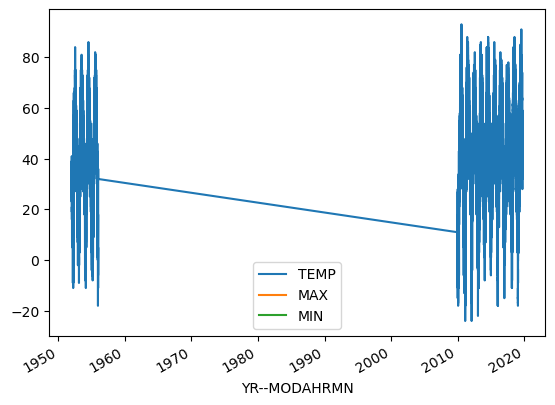

In [4]:
ax = data.plot()

_**Figure 4.3**. A basic plot of the example temperature data using Matplotlib._

Now, let's break down what just happened. First, we first created the plot object using the `plot()` method of the `data` DataFrame. Without any parameters given, this makes the plot of all columns in the DataFrame as lines of different color on the y-axis with the index, time in this case, on the x-axis. Second, in case we want to be able to modify the plot or add anything to it after the basic plot has been created, we assign the plot object to the variable `ax`. Why don't we check its data type below using the `type()` function.

In [5]:
type(ax)

matplotlib.axes._axes.Axes

OK, so this is a data type we have not seen previously, but clearly it is part of matplotlib. In case you were skeptical before, we now have evidence that pandas is using matplotlib for generating plots.

### Selecting plot data based on date

Now we can make a few small changes to our plot to further explore plotting with pandas. We can begin by plotting only the observed temperatures in the `data['TEMP']` column. In addition, we can restrict ourselves to observations from only the afternoon of October 1, 2019 (the last day in this dataset). We will do this by first creating a pandas series for only the desired data column and restricting the dateof interest. Once we have created the new pandas series we can plot the results.

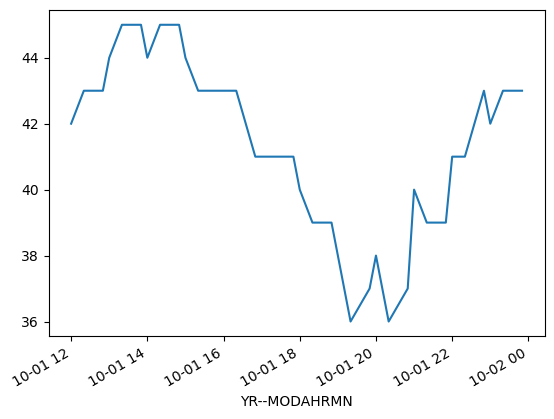

In [6]:
# Create basic plot with subset of data
oct1_temps = data["TEMP"].loc[data.index >= "201910011200"]
ax = oct1_temps.plot()

_**Figure 4.4**. A plot of the example temperature data for the afternoon of October 1, 2019._

So, what did we change this time? First, we selected only the `'TEMP'` column from the `data` DataFrame by using `data['TEMP']` instead of `data`. Second, we added a restriction to the date range using `loc[]` to select only rows where the index value `data.index` is greater than `'201910011200'`. In that case, the number in the string is in the format `'YYYYMMDDHHMM'`, where `YYYY` is the year, `MM` is the month, `DD` is the day, `HH` is the hour, and `MM` is the minute. This will result in temperatures only from noon onwards on October 1, 2019. Finally, by saving this selection to the variable `oct1_temps` we're able to now use `oct1_temps.plot()` to plot only our selection. As you can see, we are able to easily control the values plotted in pandas, but we can do even better.

## Basic plot formatting

We can control the appearance of our plots, making them look nicer and provide more information by using a few additional plotting options available in pandas and/or matplotlib. Let's start by changing the line format, adding some axis labels, and adding a title.

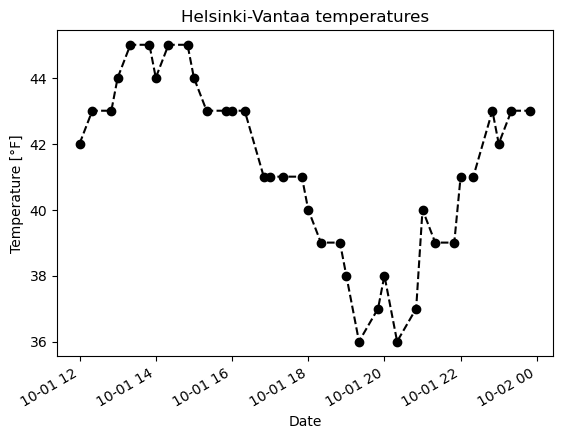

In [7]:
# Change line and symbol format, and add axis labels/title
ax = oct1_temps.plot(
    style="ko--",
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
)

_**Figure 4.5**. A plot of the example temperature data with additional formatting, a title, and axis labels._

Now we see that our temperature data as a black dashed line with circles indicating the temperature values from the data file. This comes from the additional parameter `style='ko--'`. In this case, `k` tells the `oct1_temps.plot()` function to use black color for the lines and symbols, `o` tells it to show circles at the data points, and `--` says to use a dashed line between points. You can use `help(oct1_temps.plot)` to find out more about formatting plots. We have also added a title using the `title` parameter, and axis labels using the `xlabel` and `ylabel` parameters.

## Formatting and annotating the figure

In addition to labeling the plot axes and adding a title, there are several other common plot attributes one might like to utilize. We briefly present some of the most common plot features here and then demonstrate how they work in a modified example plot below.

**Changing the figure size**

While the default plot sizes we're working with are fine, it is often helpful to be able to control the figure size. Fortunately, there is an easy way to change the figure size in pandas and matplotlib. In order to define the figure size, we simply include the `figsize` parameter with a tuple (set of values in normal parentheses) that lists the width and height of the figure (in inches!).

For example, adding the parameter

```python
figsize=(12, 6)
```
to the `ax.plot()` function will increase the figure size to be 12 inches wide and 6 inches tall.

Note that it is also possible to change the default figure size for all figures in a Jupyter Notebook by importing the pyplot module from matplotlib (i.e., `import matplotlib.pyplot as plt`)and then defining the default figure size using `plt.rcParams['figure.figsize'] = [12, 6]`. In this case the figure size should be given as a Python list.

**Adding text to the figure**

It is also possible to add text that can be displayed on a plot using `ax.text()`. For example, 

```python
ax.plot(...)
x, y = "201910011800", 42
ax.text(x, y, "This is my text.")
```

would add the text "This is my text." aligned to the left starting from the date and time 6:00 pm on October 1, 2019 (`x="201910011800"`) and at temperature `y=42`. Notice that the `x` coordinate is passed as a text following the formatting in the original data.

**Changing the axis ranges**

In some cases you may want to plot only a subset of the data you are working with. You can modify the range of values that are plotted by definiing the axis ranges. Changing the plot axes can be done using the `xlim` and `ylim` parameters of the `plot()` function, where `xmin` is the minimum bound of the x-axis, `xmax` is the maximum bound, and the same goes for the y-axis with `ymin` and `ymax`. For example, adding

```python
ax.plot(
    ...
    xlim=["201910011500", "201910012200"],
    ylim=[38, 44]
)
```

to the parameter list for `ax.plot()` would change the x-axis range to 3:00 pm to 10:00 pm on October 1, 2019 and the y-axis range to 38 to 44 degrees.

It is also possible to use the `datetime` library to make it somewhat easier to format ranges when defining axis limits. The benefit is that it can be more clear to define dates in the `datetime` format as opposed to a long text string. As an example, we could define the same date ranges as above using the format below. Note that we must first import the `datetime` library before using it.

```python
from datetime import datetime

# Use datetime to define axis limits
xmin = datetime(2019, 10, 1, 15)
xmax = datetime(2019, 10, 1, 22)

...
ax.plot(
    ...
    xlim=[xmin, xmax]
)
```

In this case, 3:00 pm on October 1, 2019 is defined by `datetime(2019, 10, 1, 15)` using the datetime library. In this format we are able to specify a set of comma-separated values for the year, month, day, hour, minute, seconds, and microseconds to define a date. If only year, month, and day are given, datetime assumes the time on that day is midnight at the start of the day.


Defining axis ranges this way is handy becaues it will adjust the range of values shown on the plot, but not alter the source data in any way. This can be quite nice when exploring your datasets.

**Adding a legend**

The final example of a common plot feature we can add is a legend. The legend allows you to provide some additional information about the lines, points, or other features of a plot, and adding a legend is quite simple. To do so, we need to add two things: a `label` parameter in the plot function that lists the text that should be displayed in the legend, and a call to the `legend()` function to display the plot legend. For example, adding the following to the plot will add and display a legend.

```python
ax.plot(
    ...
    label="Observed temperature"
)
ax.legend()
```

This would add the label "Observed temperature" to the legend for the line formatted using the `ax.plot()` function. The legend can be displayed by adding `ax.legend()` to the code.

Note that by default the legend will automatically be positioned in the top right corner of a plot, or in a location where it minimizes interference with other plot elements. The location of the legend can be controlled using the `loc` parameter in the call to the `legend()` function. The [matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) [^matplotlib-legend] contains more information about how to control the location of the plot legend.

**The modified example plot**

Based on the additions above (changing the figure size, adding text to the plot, etc.), the modified plot can be generated using the code below.

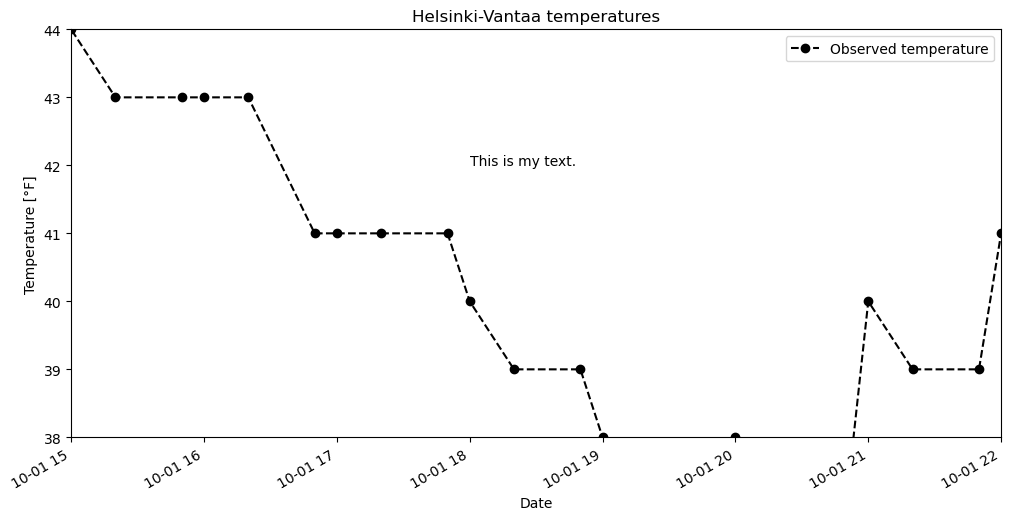

In [8]:
from datetime import datetime

# Use xlim and ylim to define the axis ranges
xmin, xmax = datetime(2019, 10, 1, 15), datetime(2019, 10, 1, 22)
ymin, ymax = 38, 44

ax = oct1_temps.plot(
    style="ko--",
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
    xlim=[xmin, xmax],
    ylim=[ymin, ymax],
    label="Observed temperature",
    figsize=(12, 6),
)

# Add text to plot
x, y = "201910011800", 42
ax.text(x, y, "This is my text.")

# Display plot legend
ax.legend()

_**Figure 4.6**. A plot of the example temperature data further modified with additional formatting and reduced axis ranges._

As you can see, we now have a more informative plot with only a few changes in the plotting code.

## Dealing with datetime axes

One issue we will encounter both with placing text on the plot and changing the axis ranges is the datetime index for our DataFrame. In order to do either thing, we need to define x-values using a datetime object. The easiest way to do this is to use the pandas `pd.to_datetime()` function, which converts a character string date to a datetime object. For example, we can convert 13:00 on October 1, 2019 from the character string `'201910011300'` to a datetime equivalent by typing

In [9]:
pd.to_datetime("201910011300")

Timestamp('2019-10-01 13:00:00')

With this datetime issue in mind, let's now create a modified version of the plot above. In this plot we can

1. Limit our time range to 12:00 to 15:00 on October 1, 2019
2. Only look at temperatures between 40-46° Fahrenheit
3. Add text to note the coldest part of the early afternoon

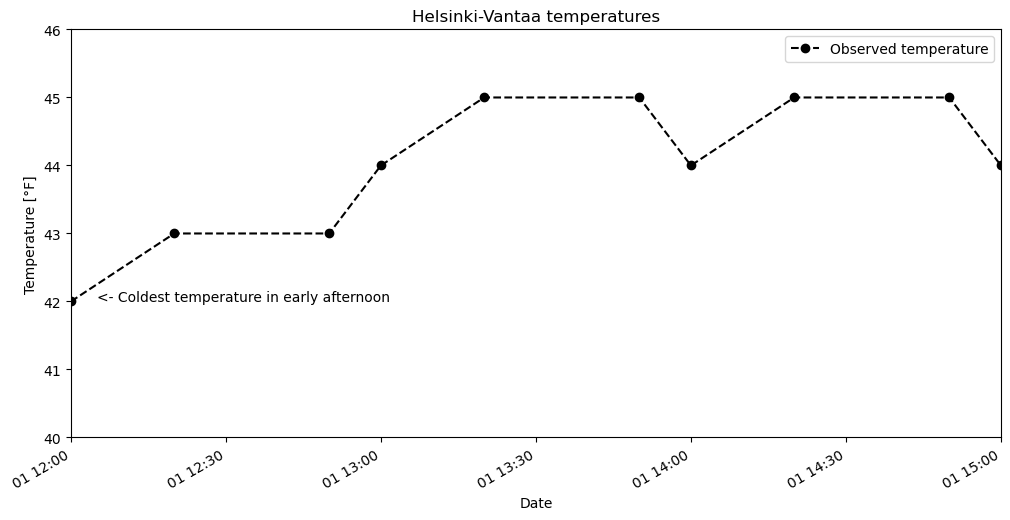

In [10]:
# Define dates
start_time = pd.to_datetime("201910011200")
end_time = pd.to_datetime("201910011500")
cold_time = pd.to_datetime("201910011205")

# Adjust axis limits
ax = oct1_temps.plot(
    style="ko--",
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
    xlim=[start_time, end_time],
    ylim=[40.0, 46.0],
    label="Observed temperature",
    figsize=(12, 6),
)

# Add plot text
ax.text(cold_time, 42.0, "<- Coldest temperature in early afternoon")
ax.legend()

_**Figure 4.7**. A plot of the example temperature data further modified with additional formatting and reduced axis ranges._

#### Question 4.1

Create a line plot similar to the examples above with the following attributes: (1) Temperature data from 18:00-24:00 on October 1, 2019, (2) 
a dotted red line connecting the observations (do not show the data points), (3) a title that reads "Evening temperatures at Helsinki-Vantaa on October 1, 2019", and (4) a text label indicating the warmest temperature in the evening.

In [11]:
# Use this cell to enter your solution.

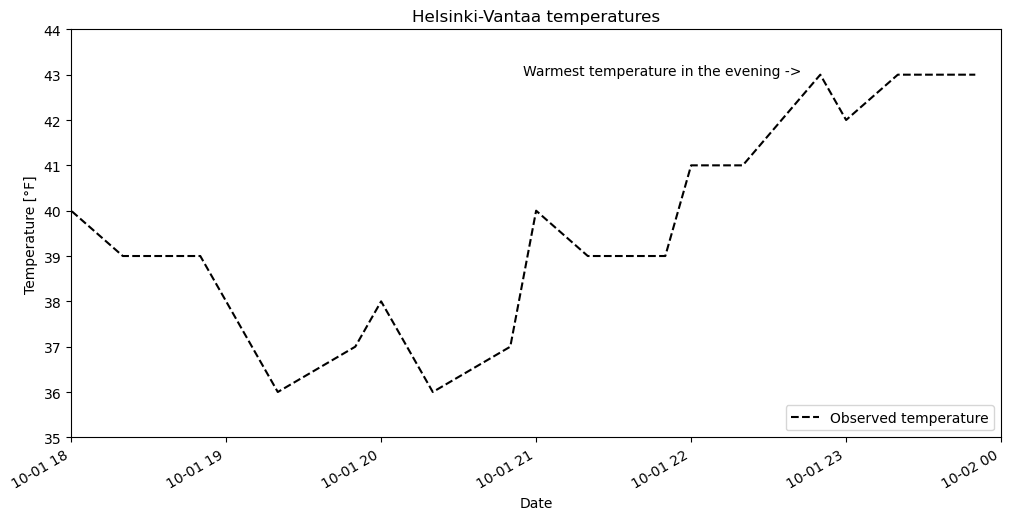

In [12]:
# Solution

# Define dates
start_time = pd.to_datetime("201910011800")
end_time = pd.to_datetime("201910020000")
warm_time = pd.to_datetime("201910012055")

# Adjust axis limits
ax = oct1_temps.plot(
    style="k--",
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
    xlim=[start_time, end_time],
    ylim=[35.0, 44.0],
    label="Observed temperature",
    figsize=(12, 6),
)

# Add plot text
ax.text(warm_time, 43.0, "Warmest temperature in the evening ->")
ax.legend(loc=4)

## Bar plots in pandas

In addition to line plots, there are many other options for plotting in pandas.
Bar plots are one option, which can be used quite similarly to line plots with the addition of the `kind=bar` parameter.
Note that it is easiest to plot our selected time range for a bar plot by selecting the dates in our data series first, rather than adjusting the plot limits. Pandas sees bar plot data as categorical, so the date range is more difficult to define for x-axis limits. For the y-axis, we can still define its range using the `ylim=[ymin, ymax]` parameter. Similarly, text placement on a bar plot is more difficult, and most easily done using the index value of the bar where the text should be placed.

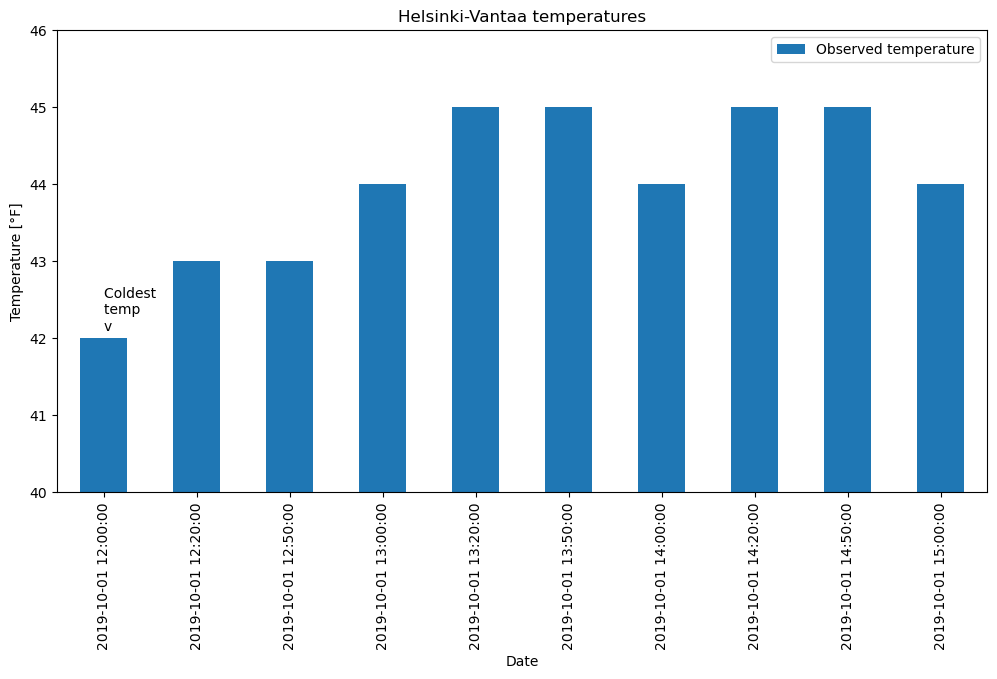

In [13]:
oct1_afternoon = oct1_temps.loc[oct1_temps.index <= "201910011500"]

# Plot temperature data as a bar plot
ax = oct1_afternoon.plot(
    kind="bar",
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
    ylim=[40, 46],
    label="Observed temperature",
    figsize=(12, 6),
)

ax.text(0, 42.1, "Coldest \ntemp \nv")
ax.legend()

_**Figure 4.8**. A bar plot using pandas with the example temperature data._

You can find more about how to format bar charts on the [pandas documentation website](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) [^pandas-docs].

## Saving your plots as image files

Saving plots created using pandas can be done in several ways.
The recommendation for use outside of Jupyter notebooks is to use Matplotlib's `plt.savefig()` function.
When using `plt.savefig()`, you simply give a list of commands to generate a plot and include `plt.savefig()` with some parameters as the last command in the Python cell.
The file name is required, and the image format will be determined based on the listed file extension.

Matplotlib plots can be saved in a number of useful file formats, including PNG, PDF, and EPS.
PNG is a nice format for raster images, and EPS is probably easiest to use for vector graphics.
Let's check out an example of how to save our lovely bar plot.

```python
oct1_afternoon = oct1_temps.loc[oct1_temps.index <= "201910011500"]

ax = oct1_afternoon.plot(
    kind="bar",
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
    ylim=[40, 46],
    label="Observed temperature",
    figsize=(12, 6),
)

ax.text(0, 42.1, "Coldest \ntemp \nv")
ax.legend()

# Write figure to PNG file
plt.savefig("bar-plot.png")
```

The commands above would both plot the figure and save a copy in a raster image titled `bar-plot.png`. If working in the JupyterLab environment, you would see the new plot file in the file browser on the left side of the notebook window.

Just to demonstrate once again, we can save another version of the plot at a higher resolution with a minor change to the plot commands above.

```python
oct1_afternoon = oct1_temps.loc[oct1_temps.index <= "201910011500"]

ax = oct1_afternoon.plot(
    kind="bar",
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
    ylim=[40, 46],
    label="Observed temperature",
    figsize=(12, 6),
)

ax.text(0, 42.1, "Coldest \ntemp \nv")
ax.legend()

# Write figure to PDF file with 600 dpi resolution
plt.savefig("bar-plot-hi-res.pdf", dpi=600)
```

This would save the output plot as a PDF file with a resolution of 600 dots per inch.

## Interactive plotting, a teaser

We have seen in the previous parts of this chapter that there are many ways to configure and visualize data using Python. Up to this point, however, we have focussed on static visualizations in Jupyter notebooks or those saved as images. As you might imagine, there are numerous Python options to also create interactive visualizations that allow those viewing them to dive deeper into the data and explore. Interactive visualizations are increasingly popular online, and here we provide a brief example of how to create an interactive visualization using the data we have already plotted above. In this example, we will be using the hvPlot library [^hvplot], which we will return to using later in Part 2 of this book.

hvPlot is a high-level plotting package that can accept several different common Python data types and plot them using using the bokeh visualization library [^bokeh]. The great thing with hvPlot is that it takes almost no effort to move from plotting in pandas to creating interactive plots. We can explore this in the following example.

Let us start by importing the pandas submodule of hvPlot.

In [14]:
import hvplot.pandas

With the submodule imported, we can simply take a slice of data from the `data` DataFrame, the month of July in 2014 in this example, and create a plot just as we would in pandas. The only difference here is that we will use the `hvplot()` method rather than the `plot()` method from pandas.

In [15]:
warnings.simplefilter("ignore")

In [16]:
july2014_df = data.loc[(data.index >= "201407010000") & (data.index < "201407310000")]

july2014_df.hvplot(
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
    ylim=[45.0, 90.0],
)

:NdOverlay   [Variable]
   :Curve   [YR--MODAHRMN]   (value)

_**Figure 4.9**. An interactive plot example using hvPlot._

Now we have an interactive line plot where the users can place their mouse cursor above the line to see the plotted values at a given location, zoom in and/or pan the plot to areas of interest, and click on the legend items to hide or display them. And as you can see, hvPlot makes it very easy to start creating your own interactive plots from pandas DataFrames.

That is all we will explore for the moment, but you are welcome to have a look at the [hvPlot User Guide](https://hvplot.holoviz.org/user_guide/index.html) [^hvplot_guide] to learn more about the types of visualizations available in hvPlot and how to use them.

## Footnotes

[^matplotlib]: <https://matplotlib.org/>
[^pyplot]: <https://matplotlib.org/api/pyplot_api.html>
[^matlab]: <https://www.mathworks.com/products/matlab.html>
[^matplotlib-legend]: <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html>
[^pandas-docs]: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html>
[^hvplot]: <https://hvplot.holoviz.org/>
[^bokeh]: <https://docs.bokeh.org/en/latest/index.html>
[^hvplot_guide]: <https://hvplot.holoviz.org/user_guide/index.html>